# K-Means Clustering?

## Introduction

K-Means clustering is one of the simplest
and most popular unsupervised machine learning algorithms. The intuition behind this technique is foundational to all unsupervised learning, clustering data based on similarity.

The general outline of the model is this: The modeler will select how many clusters they want, K. After these clusters are intially placed, data that is nearby the clusters are grouped to that cluster. This is done by minimizing the in-cluster sum of squared differences. Once all the data points are assigned to a cluster, then the algorithm finishes.

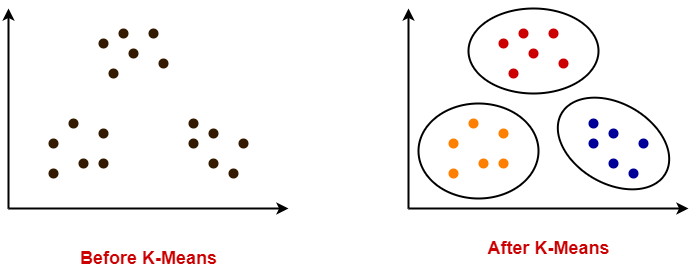

## Looking Deeper



1.   K centroids are randomly placed to form intial clusters
2.   Each data point is assigned to its nearest centroid
3. The centroid's location is updated based on the location of the data points t
4. Steps 2 and 3 are repeated until clusters and centroids no longer change.





In [1]:
import pandas as pd
filename = r"C:\Users\pjs5\Downloads\diabetes_dataset_with_notes.csv"
df = pd.read_csv(filename)


In [2]:
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,clinical_notes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,"Overweight, advised dietary and exercise modif..."
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,Healthy BMI range.
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,"Young patient, generally lower risk but needs ..."
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,"Overweight, advised dietary and exercise modif..."
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,"Healthy BMI range. High HbA1c level, indicativ..."


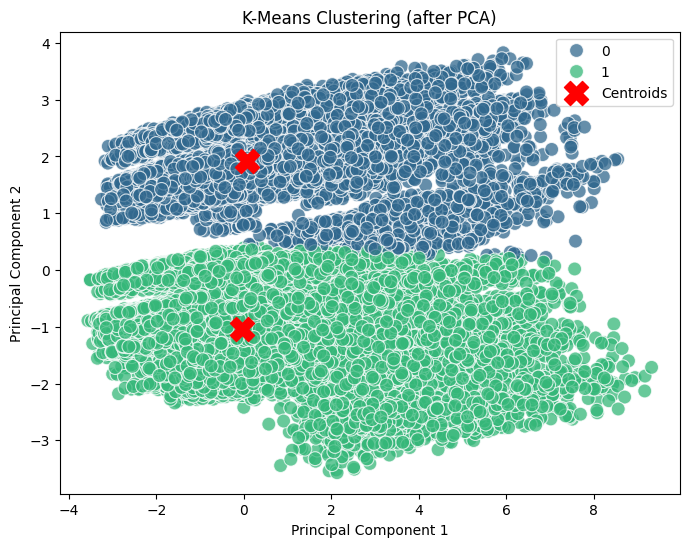

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# --- Step 1: Convert categorical variables to numeric ---
# Identify categorical columns and apply one-hot encoding
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df_numeric = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# --- Step 2: Standardize the data ---
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# --- Step 3: Use PCA to determine the two most predictive features ---
# Here we reduce to 2 dimensions which approximate the two most predictive components.
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Convert the PCA result to a DataFrame
df_pca = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

# --- Step 4: Apply K-Means clustering ---
# Set the number of clusters (e.g., 3). Adjust as needed.
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df_pca['Cluster'] = kmeans.fit_predict(df_pca)

# --- Step 5: Visualization ---
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100, alpha=0.75)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering (after PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

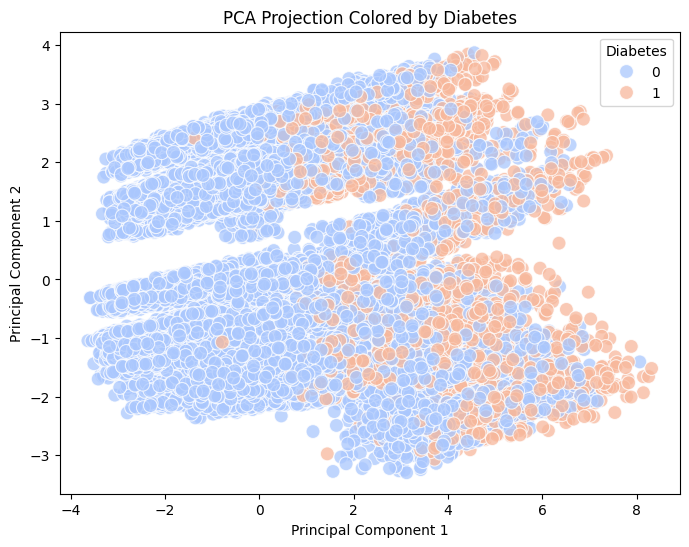

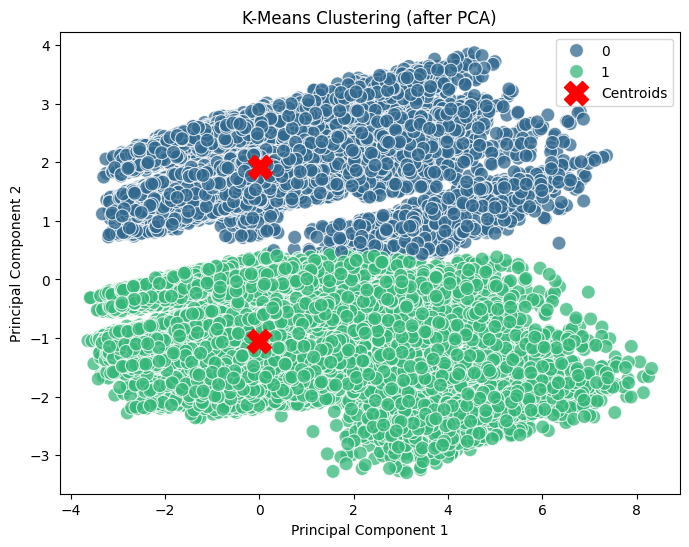

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# --- Step 1: Convert categorical variables to numeric ---
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df_numeric = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# --- Step 2: Separate the target variable for later use ---
if 'diabetes' in df_numeric.columns:
    diabetes_labels = df_numeric['diabetes']
    df_numeric = df_numeric.drop(columns=['diabetes'])
else:
    raise ValueError("The 'diabetes' column is not in the dataset.")

# --- Step 3: Standardize the data ---
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# --- Step 4: Use PCA to reduce to 2 principal components ---
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_pca['diabetes'] = diabetes_labels.values

# --- Step 5a: Plot PC1 vs PC2 colored by 'diabetes' ---
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='diabetes', palette='coolwarm', s=100, alpha=0.75)
plt.title('PCA Projection Colored by Diabetes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Diabetes')
plt.show()

# --- Step 5b: Apply K-Means clustering and plot ---
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df_pca['Cluster'] = kmeans.fit_predict(df_pca[['PC1', 'PC2']])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100, alpha=0.75)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering (after PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()